In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import os

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = r'C:\Users\Tomas\GitHub\ML_course\projects\project1\data\train1.csv\train.csv' # TODO: download train data and supply path here 
y, tx, ids = load_csv_data(DATA_TRAIN_PATH)
print(y.shape)
print(tx.shape)
print(ids.shape)

(250000,)
(250000, 30)
(250000,)


In [3]:
def compute_error(y, tx, w):
    e = y-np.matmul(tx, w)
    return e

def compute_loss(y, tx, w):
    N = len(y)
    e = compute_error(y, tx, w)
    mse = 1/(2*N)*np.sum(e**2)
    rmse = np.sqrt(2*mse)
    return rmse

In [4]:
def compute_gradient(y, tx, w):
    N = len(y)
    e = compute_error(y, tx, w)
    grad = (-1/N)*np.matmul(tx.T,e)
    return grad

def least_squares_GD(y, tx, initial_w, max_iters, gamma):
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient(y, tx, w)
        w -= gamma*grad
    loss = compute_loss(y, tx, w)
    print("Gradient Descent: loss is ", loss)
    return w, loss

In [5]:
def compute_stoch_gradient(y, tx, w):
    N = len(y)
    e = compute_error(y, tx, w)
    grad = (-1/N)*np.matmul(tx.T,e)
    return grad

def least_squares_SGD(y, tx, initial_w, max_iters, gamma,  batch_size = 1):
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for ymini, txmini in batch_iter(y, tx, batch_size, num_batches=1, shuffle=True):
            grad = compute_gradient(ymini, txmini, w)
            w -= gamma*grad
    loss = compute_loss(ymini, txmini, w)
    print("Stochastic Gradient Descent: loss is ", loss)
    return w, loss

In [6]:
def least_squares(y, tx):
    N = len(y)
    w = np.linalg.solve(np.matmul(tx.T, tx), np.matmul(tx.T,y))
    loss = compute_loss(y, tx, w)
    print("Least squares: loss is ", loss)
    return w, loss

In [7]:
def ridge_regression(y, phi, lambda_):
    N=len(phi)
    lambda_acc=2*N*lambda_
    kwad = np.matmul(phi.T,phi)
    w = np.linalg.solve(kwad+lambda_acc*np.eye(kwad.shape[0]),np.matmul(phi.T,y))
    loss = compute_loss(y, phi, w)
    print("Ridge regression: loss is ", loss)
    return w, loss

In [8]:
def logistic_regression(y, tx, initial_w, max_iters, gamma):
    
    return w, loss

In [9]:
def reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma):
    
    return w, loss



## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = r'C:\Users\Tomas\GitHub\ML_course\projects\project1\data\test1.csv\test.csv' # TODO: download test data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [11]:
#initial_w = np.ones((tx.shape[1]))
max_iters = 10
gamma = 0.0000000001
lambda_ = 0.4

In [21]:
weights_ls, loss_ls = least_squares(y, tx)
initial_w = weights_ls

weights_gd, loss_gd = least_squares_GD(y, tx, initial_w, max_iters, gamma)
weights_sgd, loss_sgd = least_squares_SGD(y, tx, initial_w, max_iters, gamma)
weights_ridge, loss_ridge = ridge_regression(y, tx, lambda_)

rmse_list = []
rmse_list.extend([loss_ls, loss_gd, loss_sgd, loss_ridge])

Least squares: loss is  0.8242412383241149
Gradient Descent: loss is  0.8242412383241149
Stochastic Gradient Descent: loss is  0.6128524292373684
Ridge regression: loss is  0.8377083826285315


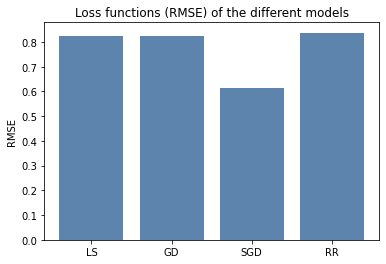

In [25]:
barWidth = 0.3
bars = ('LS', 'GD', 'SGD', 'RR')
y_pos = np.arange(len(bars))

# Create bars
height = rmse_list
plt.bar(y_pos, height, color=(0.2, 0.4, 0.6, 0.8))

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('Loss functions (RMSE) of the different models')
plt.ylabel('RMSE')

# Show graphic
plt.show()

In [ ]:
OUTPUT_PATH = r'C:\Users\Tomas\GitHub\ML_course\projects\project1\predictions_sgd.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights_sgd, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)